In [189]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
path1 = os.path.join("data","clinicaltrial_data.csv")
path2 = os.path.join("data", "mouse_drug_data.csv")

clinical_df = pd.read_csv(path1)
mouse_df = pd.read_csv(path2)


# Combine the data into a single dataset
merge_data = pd.merge(clinical_df, mouse_df, on="Mouse ID", how = "left")


# Display the data table for preview
merge_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# # Tumor Response to Treatment

In [137]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mm3 = merge_data.groupby(['Drug','Timepoint'])

# print(grouped_mm3)
# grouped_mm3.count()

# Got the mean of the Tumor Volume
tumor_vol = grouped_mm3["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
grouped_mean_df = pd.DataFrame({"Tumor Volume Mean (mm3)": tumor_vol}).reset_index()


# Preview DataFrame
grouped_mean_df.head()

,Drug,Timepoint,Tumor Volume Mean (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [138]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_sem = merge_data.groupby(['Drug','Timepoint'])

# print(grouped_sem)
# grouped_sem.count()

# Stored the standard errors in my variable
tumor_sem = grouped_sem["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
grouped_sem_df = pd.DataFrame({"Standard Error of Tumor Volumes": tumor_sem}).reset_index()


# Preview DataFrame
grouped_sem_df.head()


,Drug,Timepoint,Standard Error of Tumor Volumes
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [139]:
# Minor Data Munging to Re-Format the Data Frames
grouped_munge = grouped_mean_df.pivot_table('Tumor Volume Mean (mm3)', ['Timepoint'], 'Drug')


# Preview that Reformatting worked
grouped_munge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


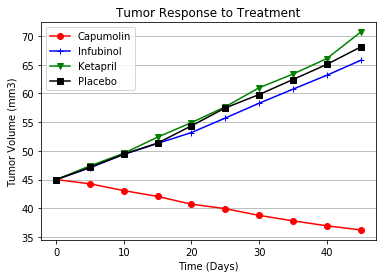

In [140]:
# Generate the Plot (with Error Bars)

# Creating x-axis
time1 = [0,5,10,15,20,25,30,35,40,45]

# Creating y-axis
capumolin = grouped_munge.iloc[:,0]

infubinol = grouped_munge.loc[:,"Infubinol"]

ketapril = grouped_munge.loc[:,"Ketapril"]

placebo = grouped_munge.loc[:, "Placebo"]

# Creating my figure
fig, ax = plt.subplots()

# Plotting Capumolin
ax.plot(time1, capumolin, color = "red", label = "Capumolin", marker = "o")

# Plotting Infubinol
ax.plot(time1, infubinol, color = "blue", label = "Infubinol", marker = "+")

# Plotting Ketapril
ax.plot(time1, ketapril, color = "green", label = "Ketapril", marker = "v")

# Plotting Placebo
ax.plot(time1, placebo, color = "black", label = "Placebo", marker = "s")

# Displaying Figure
fig;

# Creating the legend
ax.legend(loc="best")

# Setting my labels & Grid
ax.set(xlabel = "Time (Days)", ylabel="Tumor Volume (mm3)", title="Tumor Response to Treatment");

ax.grid('on', which='major', axis='y')

# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Tumor Response to Treatment.png")
path
fig.savefig(path)


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [141]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

grouped_met_df = merge_data.groupby(["Drug", "Timepoint"])

print(grouped_met_df)
grouped_met_df.count()

# Storing the mean of metastatic sites
met_mean = grouped_met_df["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_df = pd.DataFrame({"Metastatic Sites Mean": met_mean})


# Preview DataFrame
metastatic_df.head()



Metastatic Sites Mean
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [142]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

grouped_met_sem = merge_data.groupby(['Drug','Timepoint'])

# print(grouped_met_sem)
# grouped_met_sem.count()

# Storing the standard error of the metastatic sites
tumor_met_sem = grouped_met_sem["Metastatic Sites"].sem()


# Convert to DataFrame
grouped_met_sem_df = pd.DataFrame({"Standard Error of Metastatic Sites": tumor_met_sem})


# Preview DataFrame
grouped_met_sem_df.head()


Standard Error of Metastatic Sites
Drug      Timepoint                                    
Capomulin 0                                    0.000000
          5                                    0.074833
          10                                   0.125433
          15                                   0.132048
          20                                   0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [143]:
# Minor Data Munging to Re-Format the Data Frames (I think there is a mistake in preview)
grouped_munge1 = metastatic_df.pivot_table('Metastatic Sites Mean', ['Timepoint'], 'Drug')


# Preview that Reformatting worked
grouped_munge1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


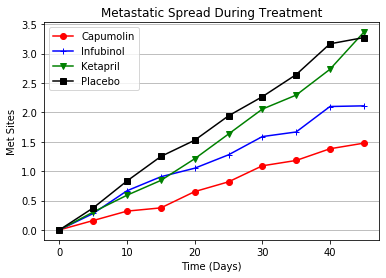

In [144]:


# Creating X-axis
time3 = [0,5,10,15,20,25,30,35,40,45]

# Creating y-axis
capumolin1 = grouped_munge1.iloc[:,0]

infubinol1 = grouped_munge1.loc[:,"Infubinol"]

ketapril1 = grouped_munge1.loc[:,"Ketapril"]

placebo1 = grouped_munge1.loc[:, "Placebo"]

# Creating my blank canvas
fig2, ax2 = plt.subplots()

# Plotting my values
ax2.plot(time1, capumolin1, color = "red", label = "Capumolin", marker = "o")

ax2.plot(time1, infubinol1, color = "blue", label = "Infubinol", marker = "+")

ax2.plot(time1, ketapril1, color = "green", label = "Ketapril", marker = "v")

ax2.plot(time1, placebo1, color = "black", label = "Placebo", marker = "s")

fig2;

# Creating the legend & grid & labels
ax2.legend(loc="best")

ax2.set(xlabel = "Time (Days)", ylabel="Met Sites", title="Metastatic Spread During Treatment");

ax2.grid('on', which='major', axis='y')

# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Metastatic Spread.png")
path
fig2.savefig(path)


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [145]:

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_sur_df = merge_data.groupby(["Drug", "Timepoint"])

# print(grouped_sur_df)
# grouped_sur_df.count()

# Storing the mouse count in my variable
mice_cnt = grouped_sur_df["Mouse ID"].count()
mice_cnt

#Convert to DataFrame
mice_df = pd.DataFrame({"Mouse Count": mice_cnt}).reset_index()


# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [146]:
# Minor Data Munging to Re-Format the Data Frames
grouped_munge2 = mice_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')


# Preview that Reformatting worked
grouped_munge2.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


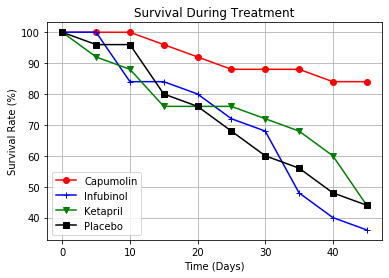

In [147]:
# Generate the Plot (Accounting for percentages)

# Creating my x-axis
time4 = [0,5,10,15,20,25,30,35,40,45]

# Creating my y -axis and formatting them in percentage terms
capumolin2 = grouped_munge2.iloc[:,0]
capumolin_percent = [(x/25)*100 for x in capumolin2]


infubinol2 = grouped_munge2.loc[:,"Infubinol"]
infubinol_percent = [(x/25)*100 for x in infubinol2]

ketapril2 = grouped_munge2.loc[:,"Ketapril"]
ketapril_percent = [(x/25)*100 for x in ketapril2]

placebo2 = grouped_munge2.loc[:, "Placebo"]
placebo_percent =[(x/25)*100 for x in placebo2]

# Creating my blank canvas
fig3, ax3 = plt.subplots()

# Plotting my data
ax3.plot(time4, capumolin_percent, color = "red", label = "Capumolin", marker = "o")

ax3.plot(time4, infubinol_percent, color = "blue", label = "Infubinol", marker = "+")

ax3.plot(time4, ketapril_percent, color = "green", label = "Ketapril", marker = "v")

ax3.plot(time4, placebo_percent, color = "black", label = "Placebo", marker = "s")

fig3;

# Creating my legent, labels, and grid
ax3.legend(loc="best")

ax3.set(xlabel = "Time (Days)", ylabel="Survival Rate (%)", title="Survival During Treatment");

ax3.grid('on', which='major')

# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Survival During Treatment.png")
path
fig3.savefig(path)

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [190]:
# retrieving the first and last rows of data of my mean volume change
grouped_munge_filtered = grouped_munge.loc[[0,45],:]

# calculatinh the pct change between these two retrieved rows
percent_change = grouped_munge_filtered.pct_change()

# Retrieving the percent change values
percent_change2 = percent_change.loc[45,:]

# Creating a function to turn my series into percentages
def times100(x):
    return x*100

# Display the data to confirm
percent_change2.apply(times100)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

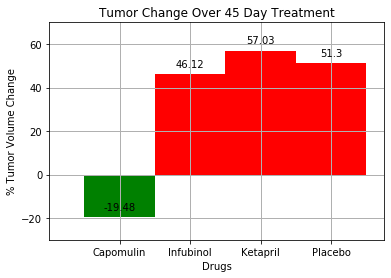

In [192]:
# Store all Relevant Percent Changes into a Tuple
relevant_percent = percent_change2.apply(times100)

# Creating my y-values
data = [relevant_percent["Capomulin"], relevant_percent["Infubinol"], relevant_percent["Ketapril"], relevant_percent["Placebo"]]

# Creating my x-axis
x_axis = np.arange(len(data))

# Creating open canvas
fig4, ax4 = plt.subplots()

# Creating my bar graph & coloring my plot
colors = ['green','red','red','red']
ax4.bar(x_axis, data, align = "center", width = 1, color = colors)

# Displaying figure
fig4;



# Tell matplotlib where we would like to place each of our x axis headers & placing grid
ax4.set_xticks(x_axis);
ax4.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"]);
ax4.grid('on', which='major', linewidth = 1)
ax4.set(xlabel = "Drugs", ylabel="% Tumor Volume Change", title="Tumor Change Over 45 Day Treatment");


# Orient axis
ax4.set_xlim(-1, len(x_axis)-0.25)
ax4.set_ylim(-30, 70)



# Labelling the percentage changes
for p in ax4.patches: 
    ax4.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Saving the Image
import os
path = os.path.join(os.path.expanduser("~"), "Desktop", "Tumor Change Over 45 Days.png")
path
fig3.savefig(path)

# Observations

In [ ]:
# Observation 1: Capomulin seems to be more effecient in reducing the spread of the tumor
# Observation 2: The tumor responded similarly to the placebo treatment as to the Infubinol and Ketapil treatment (evidence for placebo effect?)
# Observation 3: The treatments that had the worse outcome is that with Ketapril (greatest positive change)

![Metastatic Spread During Treatment](../Images/change.png)